## TED Talk Popularity Prediction

<i>TED is renowned for its commitment to sharing groundbreaking ideas, featuring a diverse array of talks that span technology, entertainment, design, and much more. With a dataset comprising over 4,000 TED talks—from thought leaders like Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates—this project leverages an expansive collection of presentations and multilingual transcripts to uncover the dynamics of audience engagement. The primary goal is to develop a robust predictive model that accurately forecasts the view counts of TEDx videos, a continuous outcome that reflects both the popularity of the speakers and the impact of the ideas shared. By employing advanced feature engineering, data cleaning, and rigorous model evaluation, this project aims to provide deep insights into the key factors that drive viewership, ultimately guiding content strategy and innovation within the TED community.
</i>

<h2>Goal</h2>

<p><i>
Build a model to predict TED Talk popularity and uncover key features that drive high view counts.
<i/></p>


## Variable Descriptions

###  TED Talk Metadata

| **Variable**      | **Description** |
|-------------------|-----------------|
| `comments`        | Number of comments left by viewers on the TED Talk. |
| `description`     | A brief summary of the TED Talk content. |
| `duration`        | Duration of the talk in seconds. |
| `event`           | The TED event where the talk was presented (e.g., `TED2006`). |
| `film_date`       | Unix timestamp of the filming date. |
| `published_date`  | Unix timestamp of when the talk was published online. |
| `languages`       | Number of languages the talk has been translated into. |

###  Speaker Information

| **Variable**         | **Description** |
|----------------------|-----------------|
| `main_speaker`       | Name of the main speaker. |
| `name`               | Full label (often combines speaker name and talk title). |
| `num_speaker`        | Number of speakers in the talk. |
| `speaker_occupation` | Profession or role of the speaker(s). |

###  Content & Engagement Features

| **Variable**    | **Description** |
|------------------|-----------------|
| `title`          | Title of the TED Talk. |
| `tags`           | List of tags or themes (e.g., `creativity`, `education`). |
| `ratings`        | Viewer reaction ratings with categories and counts (e.g., `Funny`, `Inspiring`). |
| `related_talks`  | List of recommended talks with metadata (title, duration, speaker, etc.). |
| `url`            | Web link to the talk on TED's official site. |

###  Target Variable

| **Variable** | **Description** |
|--------------|-----------------|
| `views`      | Total number of views — **target variable for prediction**. |

---

###  Notes

- `film_date` and `published_date` are in **Unix timestamp** format.
- `ratings` and `related_talks` are **nested JSON** structures — useful for advanced feature engineering.
- `views` is a **continuous variable** (regression target).


# Process Towards Goal

1. **Importing necessary libraries**  
   *(For model building we’re going to use scikit-learn)*

2. **Importing dataset**

3. **Data processing for EDA**

4. **Exploratory Data Analysis (EDA)**

5. **Deriving insights and short conclusions**

6. **Data Cleaning / Null Value / Missing Value Treatment**

7. **Feature Engineering**

8. **Correlation Analysis and Feature Selection**

9. **Model Building**

10. **Hyperparameter Tuning**

11. **Comparison of Models**

12. **Conclusion**


# *Importing necessary libraries*

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime
from wordcloud import WordCloud
import re
!pip install squarify
import squarify
import warnings
from sklearn.preprocessing import StandardScaler
!pip install category_encoders
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import ast
import category_encoders as ce
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# *Importing dataset*

In [85]:
df = pd.read_csv('G-A.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# *Data processing for EDA*


In [86]:
# Inspecting the dataset
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
df.info()

Dataset Shape: (2550, 17)
Column Names: ['comments', 'description', 'duration', 'event', 'film_date', 'languages', 'main_speaker', 'name', 'num_speaker', 'published_date', 'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title', 'url', 'views']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_t

### *Conversion for Date Columns* *texte en italique*

In [87]:
# Convert film_date and published_date to datetime objects
df['film_date'] = pd.to_datetime(df['film_date'], unit='s', errors='coerce')
df['published_date'] = pd.to_datetime(df['published_date'], unit='s', errors='coerce')
df[['film_date', 'published_date']].head()


,film_date,published_date
0,2006-02-25,2006-06-27 00:11:00
1,2006-02-25,2006-06-27 00:11:00
2,2006-02-24,2006-06-27 00:11:00
3,2006-02-26,2006-06-27 00:11:00
4,2006-02-22,2006-06-27 20:38:00


 ### *Formating and transforming the irregularities in features and Missing Values*

In [88]:
# Safely converting string representations of lists/dictionaries
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['related_talks'] = df['related_talks'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['ratings'] = df['ratings'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# only assigning 2 values TEDx and TEd for relevant event
df['event'] = df['event'].apply(lambda x: 'TEDx' if 'TEDx' in x else 'TED')


In [89]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values[missing_values > 0])

Missing Values per Column:
 speaker_occupation    6
dtype: int64


In [90]:
# Check the exact number of rows before dropping
original_count = len(df)
print(f"Original dataset size: {original_count} rows")

# Drop rows with missing speaker_occupation DIRECTLY in the existing DataFrame
df.dropna(subset=['speaker_occupation'], inplace=True)

# Verify the number of rows removed
new_count = len(df)
dropped_count = original_count - new_count
dropped_percentage = (dropped_count / original_count) * 100

print(f"Rows with missing speaker occupation dropped: {dropped_count}")
print(f"Percentage of data removed: {dropped_percentage:.2f}%")
print(f"New dataset size: {new_count} rows")

Original dataset size: 2550 rows
Rows with missing speaker occupation dropped: 6
Percentage of data removed: 0.24%
New dataset size: 2544 rows


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2544 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2544 non-null   int64         
 1   description         2544 non-null   object        
 2   duration            2544 non-null   int64         
 3   event               2544 non-null   object        
 4   film_date           2544 non-null   datetime64[ns]
 5   languages           2544 non-null   int64         
 6   main_speaker        2544 non-null   object        
 7   name                2544 non-null   object        
 8   num_speaker         2544 non-null   int64         
 9   published_date      2544 non-null   datetime64[ns]
 10  ratings             2544 non-null   object        
 11  related_talks       2544 non-null   object        
 12  speaker_occupation  2544 non-null   object        
 13  tags                2544 non-null   object        
 1

The <b >"name"</b> column is redundant because it duplicates information already present in other columns:

main_speaker already contains the speaker's name

title already contains the talk title

In [92]:
# Dropping the all name column.

df.drop('name', axis=1, inplace=True)

In [93]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED,2006-02-25,60,Ken Robinson,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED,2006-02-25,43,Al Gore,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED,2006-02-24,26,David Pogue,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED,2006-02-26,35,Majora Carter,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED,2006-02-22,48,Hans Rosling,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# *Exploratory data analysis*

In [94]:
pd.set_option('float_format', '{:f}'.format)
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2544.000000,2544.000000,2544,2544.000000,2544.000000,2544,2544.000000
mean,191.706761,827.316431,2011-11-20 22:29:22.311320832,27.319969,1.028302,2012-07-28 06:17:50.269260800,1699779.206761
min,2.000000,135.000000,1972-05-14 00:00:00,0.000000,1.000000,2006-06-27 00:11:00,50443.000000
25%,63.000000,578.750000,2009-11-06 00:00:00,23.000000,1.000000,2010-03-11 21:00:45,756580.250000
50%,118.000000,848.500000,2012-04-01 00:00:00,28.000000,1.000000,2012-06-29 02:04:06.500000,1123870.500000
75%,222.000000,1047.000000,2014-10-10 06:00:00,33.000000,1.000000,2015-02-09 21:50:26.750000128,1702149.000000
max,6404.000000,5256.000000,2017-08-27 00:00:00,72.000000,5.000000,2017-09-22 15:00:22,47227110.000000
std,282.613719,373.828955,NaN,9.563529,0.207945,NaN,2501042.800123


### *Visual Inspection of Data Distributions*

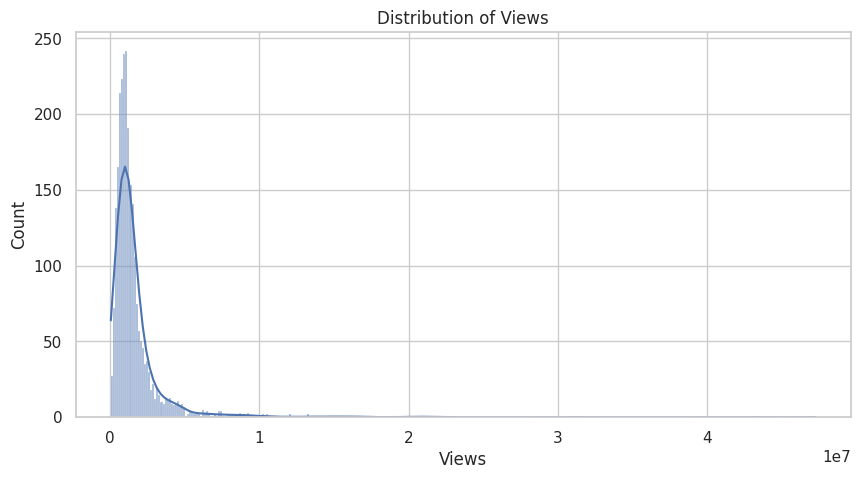

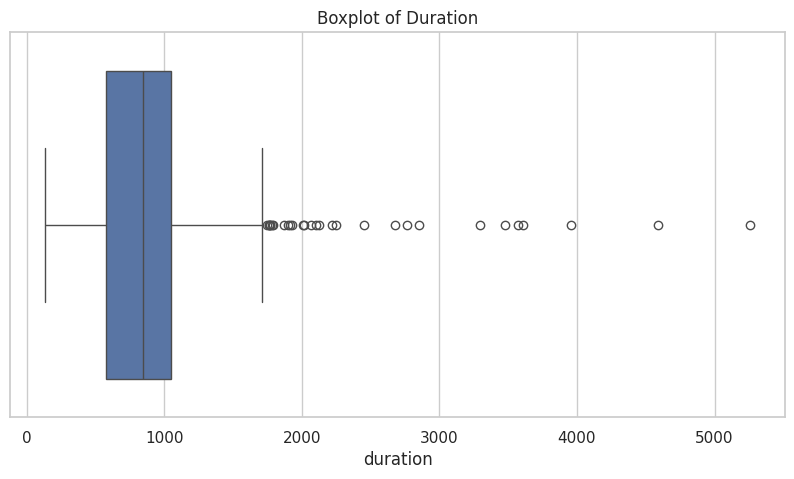

In [95]:


# Histogram for views
plt.figure(figsize=(10, 5))
sns.histplot(df['views'], kde=True)
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.show()

# Boxplot for duration to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['duration'])
plt.title("Boxplot of Duration")
plt.show()


### Correlation Analysis





Numeric DataFrame Columns: ['comments', 'duration', 'languages', 'num_speaker', 'views']


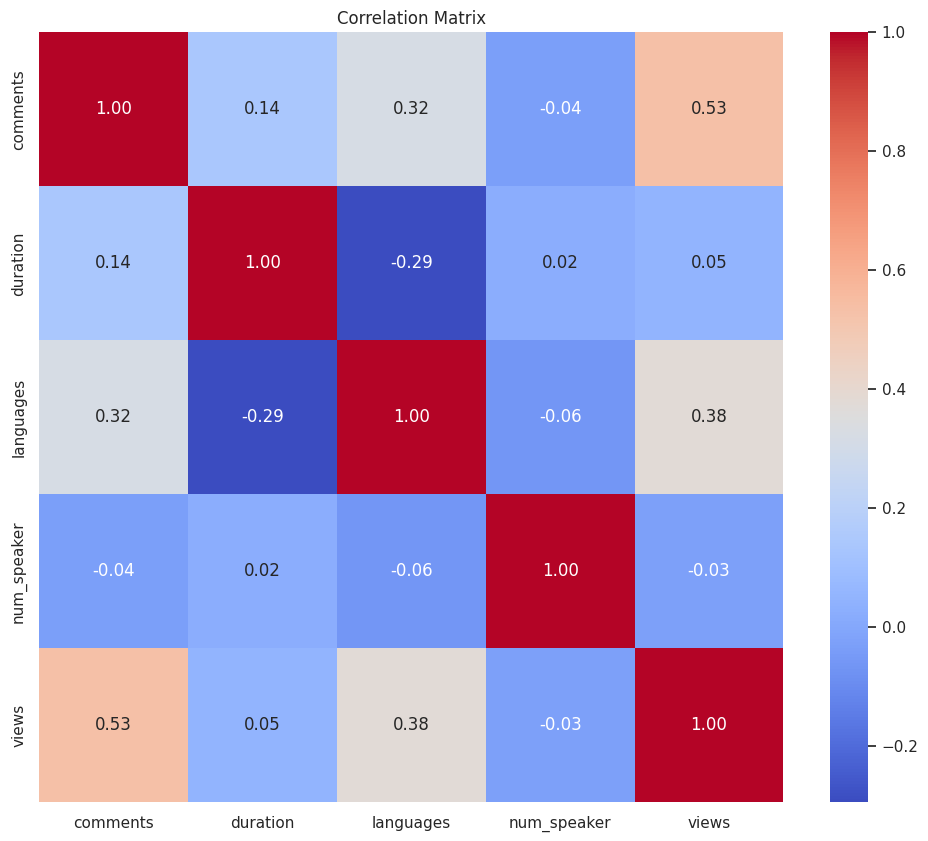

In [96]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
print("Numeric DataFrame Columns:", numeric_df.columns.tolist())

# Compute correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


### Based on the correlation matrix:

* Comments and Views: There's a moderate positive correlation (0.53) between the number of comments and views.

* Languages and Views: There's a weak positive correlation (0.38) between the number of languages and views.

* Duration and Languages: There is a small negative correlation (-0.29) between the duration and the number of languages.

* Number of Speakers: The number of speakers has a very weak correlation with all other variables.

### Analysing the Speaker, its occurances and impact on views, comments etc.

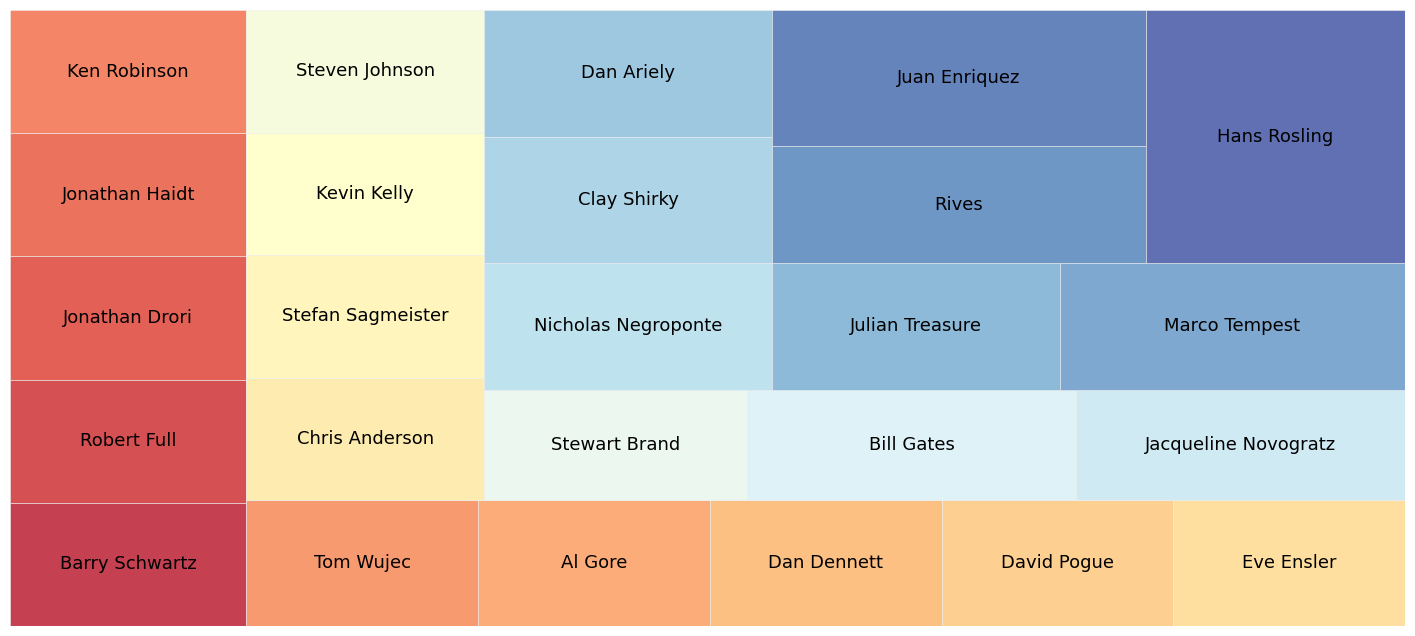

Top Speaker: Hans Rosling
Number of Talks: [9]


In [97]:
# storing the counts of top 25 speaker in a dataframe
speaker_counts = pd.DataFrame(
    df.main_speaker.value_counts().sort_values())


# storing the labels and values individually for tree map
a = speaker_counts.tail(25).index.tolist()
d = speaker_counts.tail(25).values.flatten().tolist()  #using tail because its sorted in ascending order

#plotting the tree map with squarify library
plt.rcParams['figure.figsize'] = [18, 8]
plt.style.use('ggplot')

squarify.plot(sizes=d,label=a, alpha=.8,
              text_kwargs={'fontsize': 13, 'color': 'black'},
              color=sns.color_palette("RdYlBu", len(d)))

plt.axis("off")
plt.show()
# Display the speaker with the highest count
top_speaker = speaker_counts.tail(1)  # The last row in ascending order has the max count
print("Top Speaker:", top_speaker.index[0])
print("Number of Talks:", top_speaker.values[0])



### Percentage Repeatation of speakers

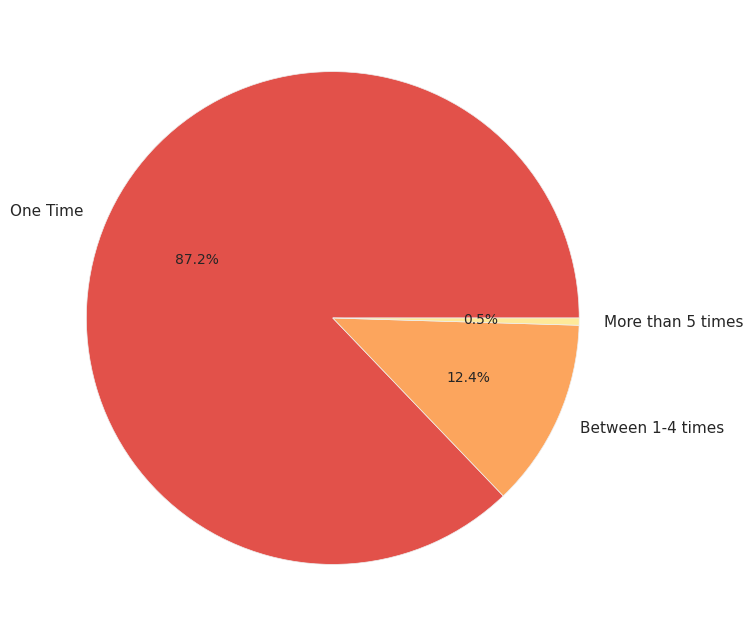

In [98]:
# Reset the index and rename columns
speaker_counts = df['main_speaker'].value_counts().reset_index()
speaker_counts.columns = ['speaker', 'count']

# Now, use the 'count' column for your calculations:
only1 = len(speaker_counts[speaker_counts['count'] == 1])
less_than5 = len(speaker_counts[(speaker_counts['count'] > 1) & (speaker_counts['count'] < 5)])
more_than5 = len(speaker_counts[speaker_counts['count'] >= 5])
total = len(speaker_counts)

data = [round(only1/total*100,2), round(less_than5/total*100,2), round(more_than5/total*100,2)]
labels = ['One Time', 'Between 1-4 times', 'More than 5 times']
colors = sns.color_palette('Spectral')[0:5]

plt.pie(data, labels=labels, colors=colors, autopct='%.1f%%')
plt.show()


We observe that only about 0.5% of speakers have presented on TED more than five times, 12.4% have returned 1–4 times, and 87.2% are new to the stage. This indicates that TED events mainly feature fresh voices with a small core of repeat presenters.

### Analysing top 20 Speakers with highest average views

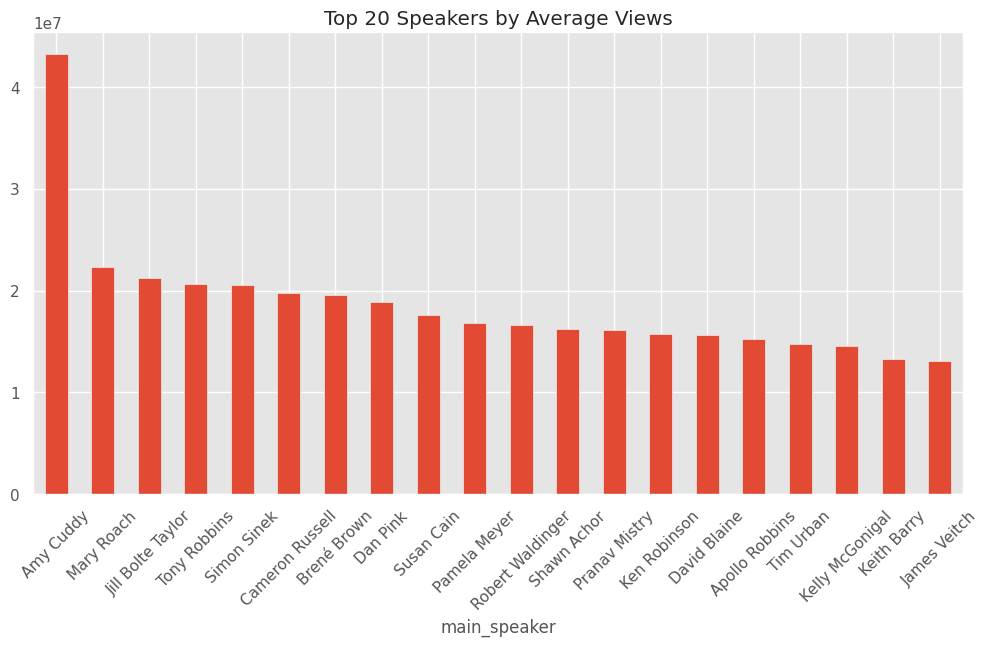

The main speaker with the highest average views is Amy Cuddy. This may be due to various factors, with popularity being key.


In [99]:
# Plotting the top 20 speakers with most views from the given data

top20 = df.groupby('main_speaker')['views'].mean().sort_values(ascending=False).head(20)
top20.plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Top 20 Speakers by Average Views")
plt.show()

print(f"The main speaker with the highest average views is {top20.idxmax()}. This may be due to various factors, with popularity being key.")


###Analyzing Speaker Occupations: Views & Comments Trends

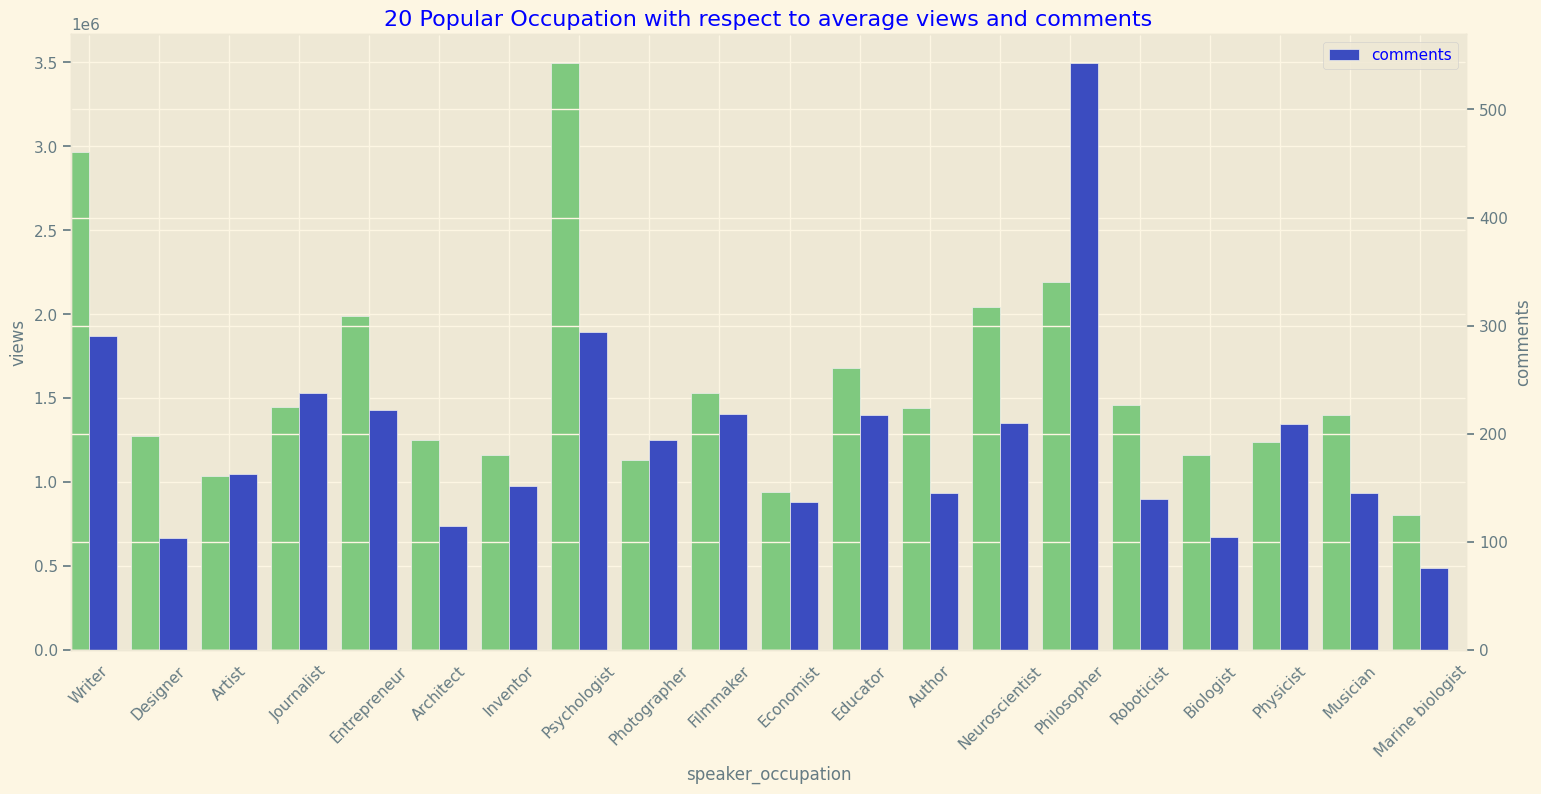

In [100]:
# grouping the occupation and applying some aggregate functions like count, mean and storing in temp dataframe

occupation_df = df.groupby('speaker_occupation').agg(
    {'speaker_occupation':'count', 'views':'mean', 'comments':'mean' }).fillna(0) # filling the NaN with 0 for now

# changing the column name as it has duplicate column name
occupation_df.columns.values[0] = "counts"

# storing only top 20 in the dataframe by popularity
occupation_df = occupation_df.sort_values('counts', ascending=False).head(20)
occupation_df.drop('counts', axis=1, inplace=True)


# started plotting
plt.style.use('Solarize_Light2') # setting the theme of matplotlib
plt.rcParams.update({'text.color': "blue"}) # formatting the colors

ax = plt.figure().add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

occupation_df.views.plot(kind='bar', ax=ax,colormap='Accent', width=width, position=1, rot= 45) # the frist axis bar chart of views with y on left side
occupation_df.comments.plot(kind='bar', ax=ax2, colormap='coolwarm', width=width, position=0) # second axis bar chart of comments with y axis on right side
ax.set_ylabel('views')
ax2.set_ylabel('comments')
plt.title('20 Popular Occupation with respect to average views and comments')
plt.legend()
plt.show()

### Insights from the bar chart :

* **Inventors** have the highest average views among all occupations.

* **Philosophers** receive the most comments, possibly because their topics spark curiosity and discussion.

* **Writers** and **psychologists** also perform well in terms of views.

* Some professions like ***marine biologists*** or ***musicians*** tend to get both fewer views and comments.

### Analyze the average number of views and comments per year, along with the average video duration over the years.

[]

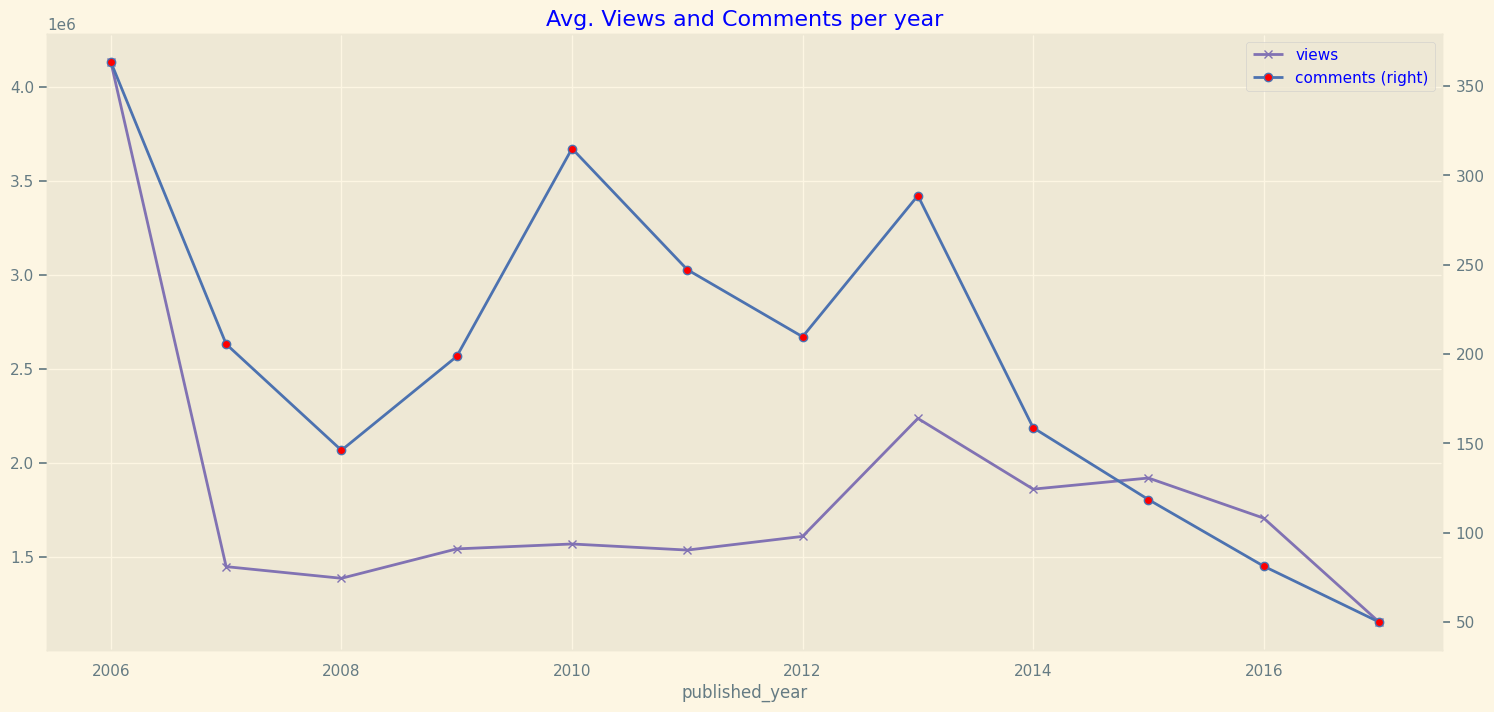

In [101]:
# Creating a column of publishing year from the published date column

df['published_year'] = pd.DatetimeIndex(df['published_date']).year

# plotting the two plots for avrage views and average comments for each year
df.groupby('published_year')['views'].mean().plot(marker = 'x', markerfacecolor = 'red', color='m', legend=True)
df.groupby('published_year')['comments'].mean().plot(secondary_y=True, marker = 'o', markerfacecolor = 'red', color= 'b', legend=True)
plt.title('Avg. Views and Comments per year')

plt.plot()

### Insights from Avg. Views and Comments per Year Plot :

 * Talks published around **2006** received the ***highest average*** views and comments.

* After **2006**, there’s a noticeable decline in both metrics, with views and comments gradually decreasing over the years.

* A small peak in views reappears around **2010** and **2013**, but never reaches ***the early years'*** levels.

* This suggests older talks had more lasting impact or visibility, possibly due to less competition or stronger curation.




[]

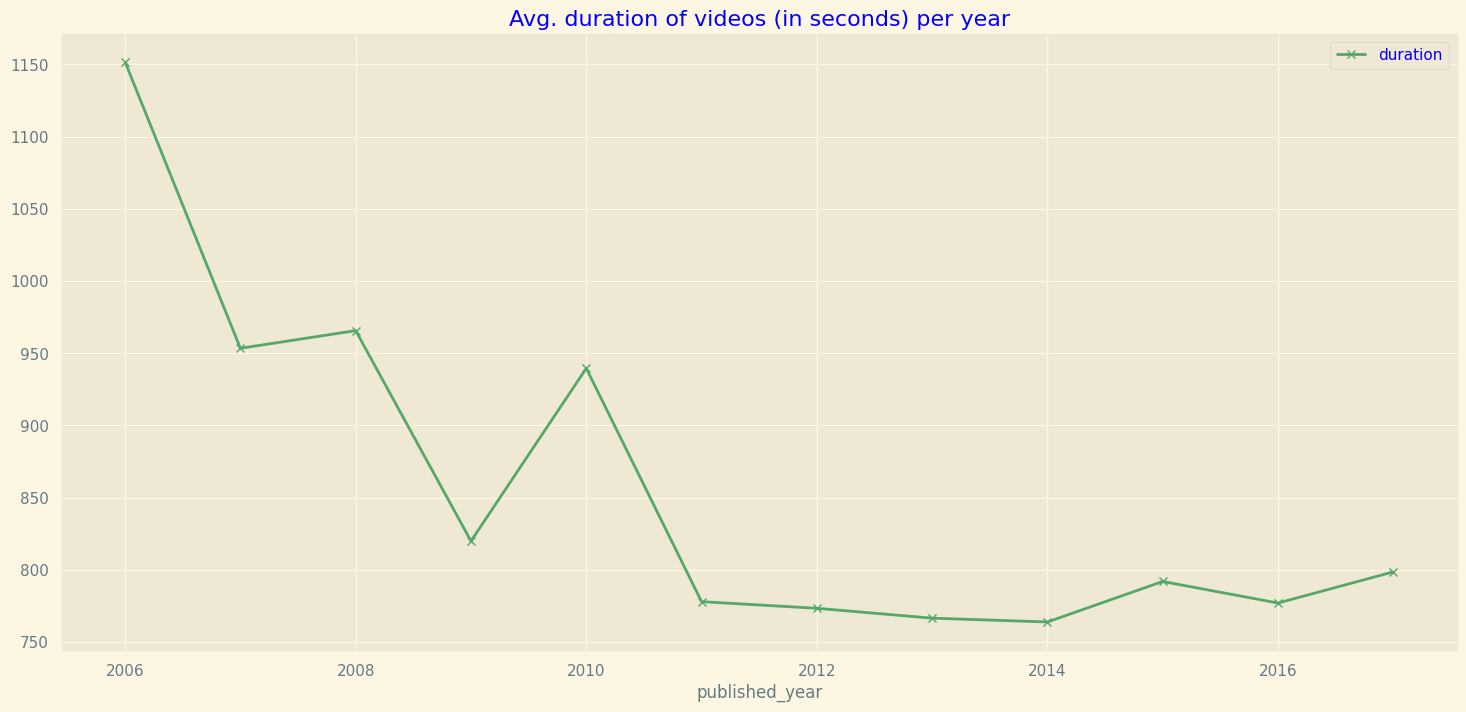

In [102]:
# Plotting the Average duration thorught the years of ted talks

df.groupby('published_year')['duration'].mean().plot(
                    marker = 'x', markerfacecolor = 'red', color='g', legend=True)

plt.title('Avg. duration of videos (in seconds) per year')
plt.plot()

### Avg. Video Duration per Year :

* In 2006, TED Talks were longest on average (~1150 seconds).

* Over time, durations steadily decreased, hitting a low around 2012–2014 (~750–800 seconds).

* Slight fluctuations after that, but overall trend shows shorter talks in recent years — possibly to align with shorter attention spans or content optimization.

### *Views with respect to type of Events*

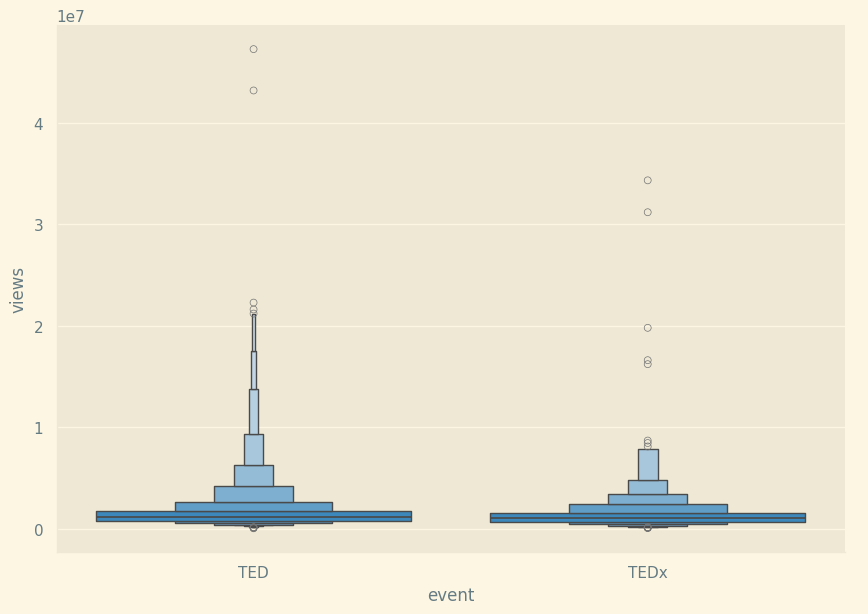

In [103]:
# plotting a boxen plot, a detailed version of box plot
sns.catplot(data=df, x="event", y="views", kind='boxen', height = 6.25, aspect=11/8)

### The boxen plot compares the distribution of views between TED and TEDx events. Key observations:

* Both event types show similar overall view distributions
* The distributions are heavily right-skewed, with most talks receiving fewer views while a small number of talks receive exceptionally high viewership
* TED events appear to have slightly higher median views compared to TEDx
   events
* TEDx talks show somewhat more variability in the middle range of views
* Both event types have significant outliers with views exceeding 4×10^7 (40 million)
* The majority of talks for both event types have views concentrated below 1×10^7 (10 million)

### Average views based on available languages

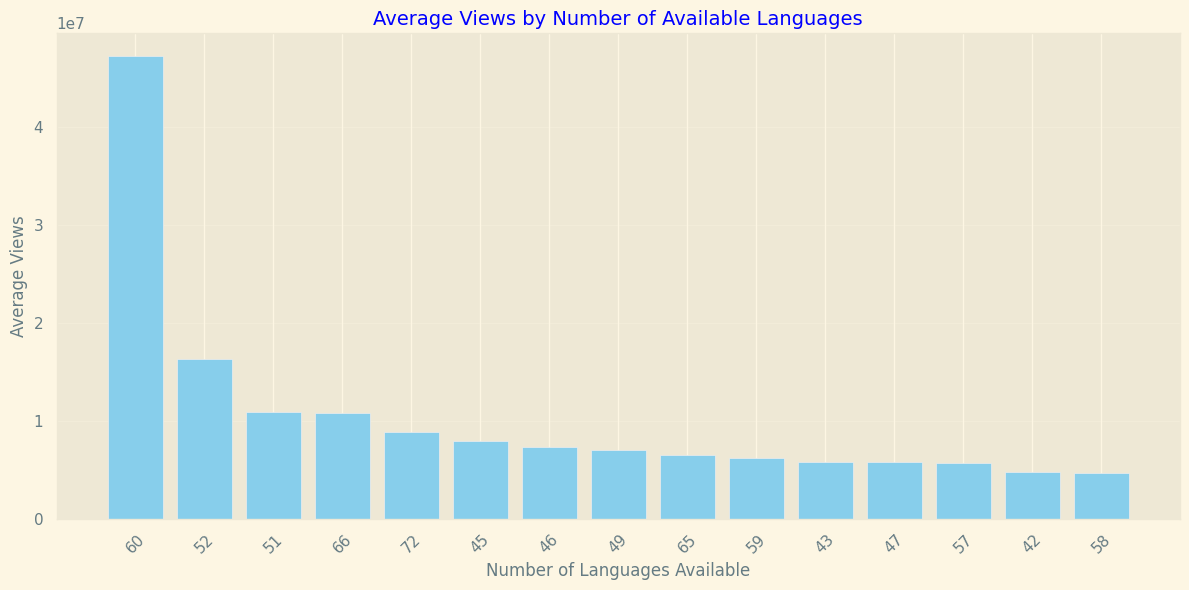

Talks available in 60.0 languages have the highest average views (47,227,110)


In [104]:
# Make sure to reset any groupby operations properly
# Option 1: More robust average views by language count

# Group talks by language count and calculate average views
lang_views = df.groupby('languages')['views'].mean().reset_index()
lang_views = lang_views.sort_values('views', ascending=False).head(15)

# Create a bar chart that doesn't rely on index access
plt.figure(figsize=(12, 6))
plt.bar(lang_views['languages'].astype(str), lang_views['views'], color='skyblue')
plt.title('Average Views by Number of Available Languages', fontsize=14)
plt.xlabel('Number of Languages Available', fontsize=12)
plt.ylabel('Average Views', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print top language counts safely with error handling
if not lang_views.empty:
    top_lang_count = lang_views.iloc[0]['languages']
    top_lang_views = int(lang_views.iloc[0]['views'])
    print(f"Talks available in {top_lang_count} languages have the highest average views ({top_lang_views:,})")
else:
    print("No language data available for analysis")

### The most frequent tags in the show

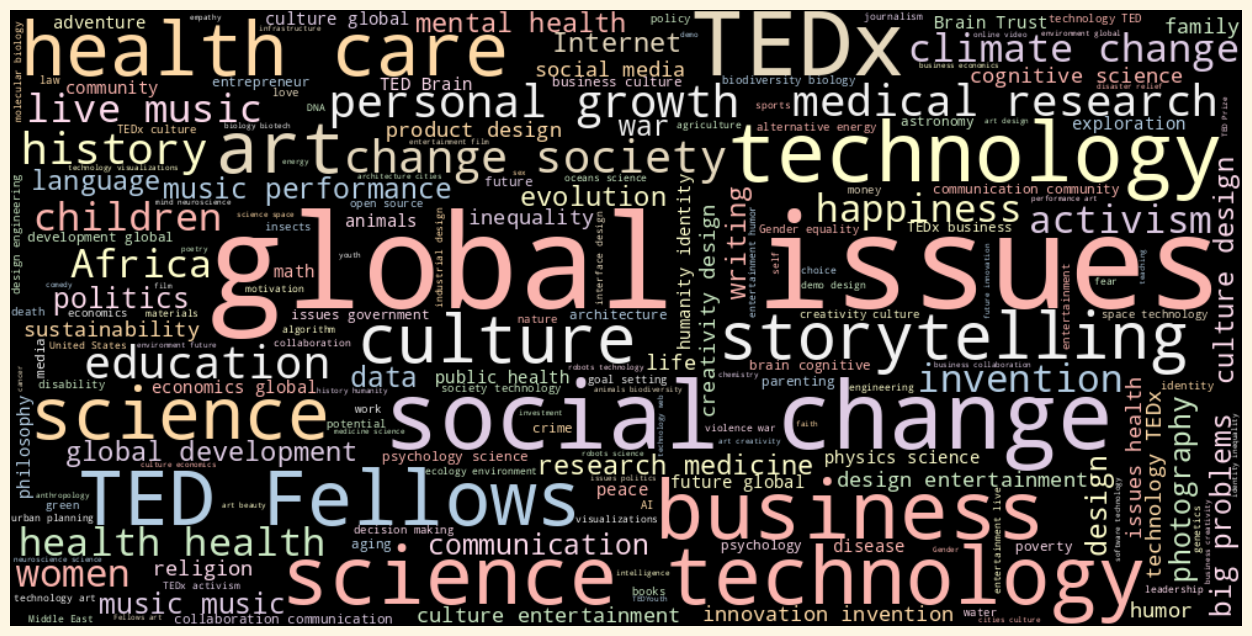

In [105]:
# adding all the words in tags into the text as a string to pass in the word cloud.

text = '+'.join(df['tags'].explode())

# creating a wordclound o#bject and assigning paramenters
wordcloud = WordCloud(width = 1000, height = 500,
                      random_state=1, background_color="black",
                      colormap="Pastel1")

# generating word clound by its object
wordcloud.generate(text)

# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

the word cloud visualization of TED Talk topics, with "global issues," "**technology**," "**science**," "**business**," and "**social**" appearing as the most prominent themes.

Generated from the dataset's topic tags, this visualization helps identify the most common subjects across TED talks, providing insights for feature engineering and understanding content patterns that might influence view counts. This analysis is part of the model selection process for predicting TED talk popularity.

### Lets see which tag has highest views

In [106]:
# getting the 10 max viewed tags in a series
top_topic = df.explode('tags').groupby(
    'tags')['views'].max().sort_values(
        ascending=False).head(10)

# converting the series to list
top_topic = top_topic.index.tolist()

print(f'Top 10 highest viewed topics are {top_topic}.')

Top 10 highest viewed topics are ['teaching', 'creativity', 'parenting', 'culture', 'education', 'dance', 'children', 'body language', 'psychology', 'self'].


### Distribution of Views and Comments and duration

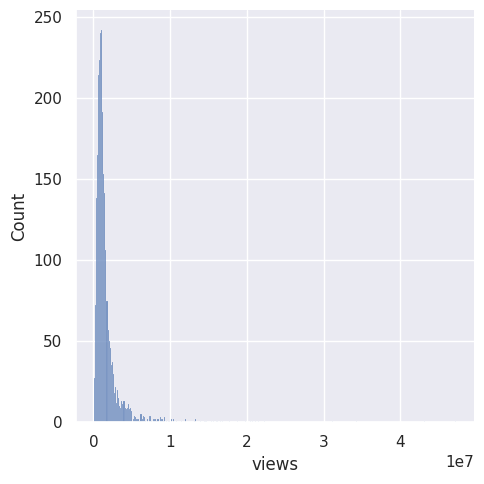

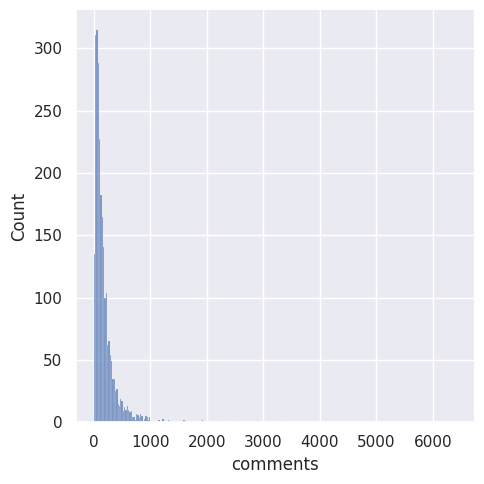

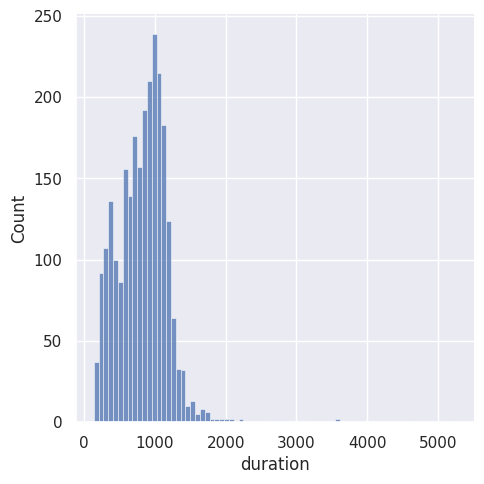

In [107]:
# keeping numerical features in a list
num_col = ['views', 'comments', 'duration']

sns.set(rc={'figure.figsize':(9,7)})

#plotting the distribution for each feature in list
for i in num_col:
  sns.displot(df[i])    #height=6.27, aspect=11.7/8.27
  plt.xlabel(i)
  plt.show()


The three graphs reveal key statistical patterns in TED talks:

Views are heavily skewed right with most talks under 5 million views
Comments follow a similar skewed pattern with most talks receiving fewer than 1,000 comments .

Duration is more normally distributed, centered around 13-20 minutes
These distributions suggest logarithmic transformations would be appropriate for views and comments when modeling talk popularity.

### Analyzing the Effect of Speaker Count on TED Talk Views

/tmp/ipython-input-108-4185199039.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=speaker_views, x='num_speaker', y='views', palette='viridis')


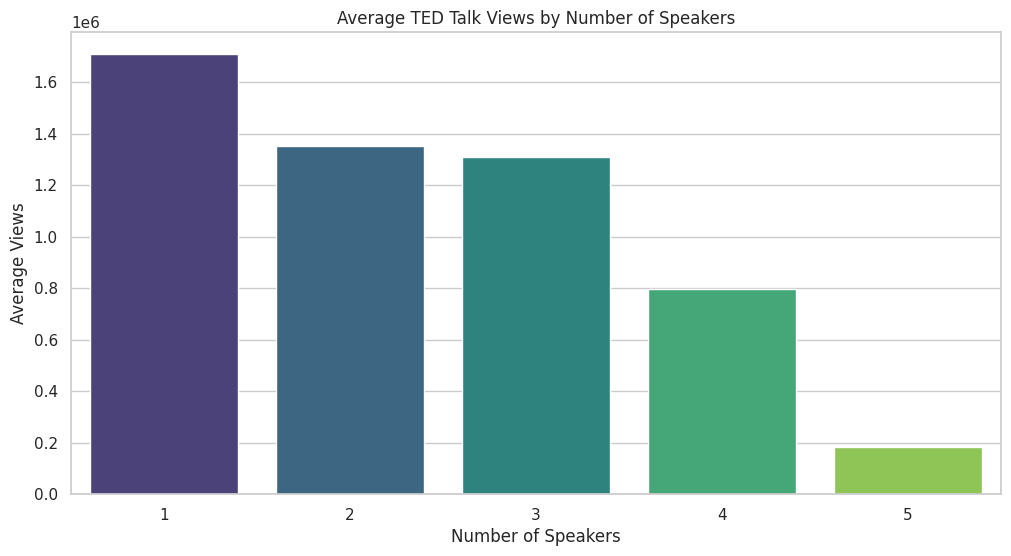

/tmp/ipython-input-108-4185199039.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='num_speaker', y='views', palette='coolwarm')


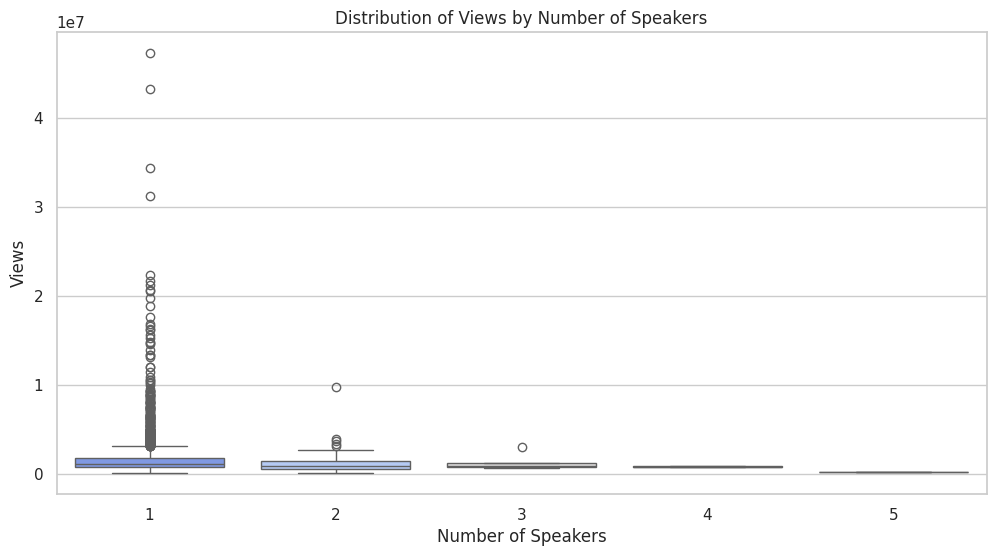

/tmp/ipython-input-108-4185199039.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_clean, x='num_speaker', y='views', jitter=True, alpha=0.5, palette='Set2')


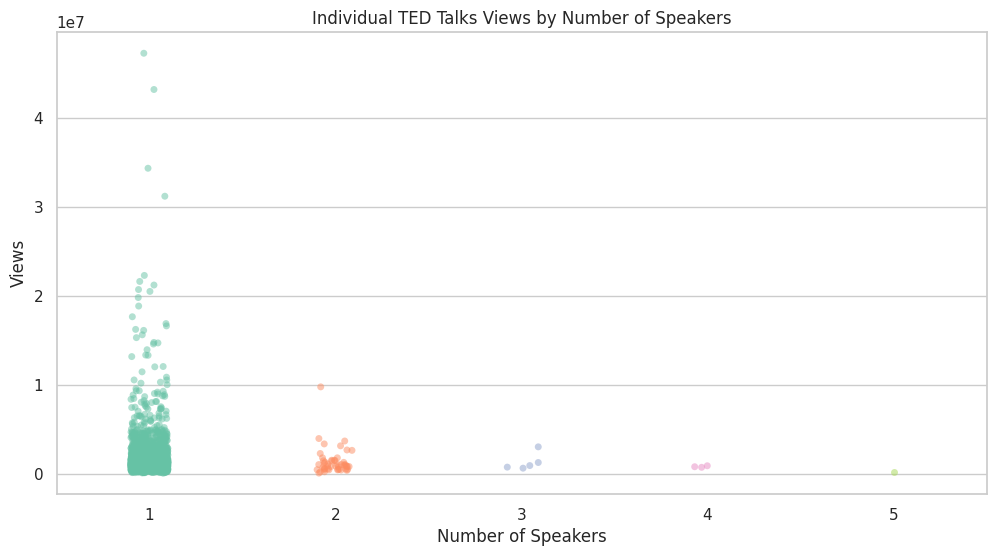

In [108]:


# Ensure numeric types (and clean data)
df['num_speaker'] = pd.to_numeric(df['num_speaker'], errors='coerce')
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df_clean = df.dropna(subset=['num_speaker', 'views'])

# Set a style for visuals
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Average views by number of speakers
speaker_views = df_clean.groupby('num_speaker')['views'].mean().reset_index()
sns.barplot(data=speaker_views, x='num_speaker', y='views', palette='viridis')
plt.title("Average TED Talk Views by Number of Speakers")
plt.xlabel("Number of Speakers")
plt.ylabel("Average Views")
plt.show()

# 2. Boxplot to show distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='num_speaker', y='views', palette='coolwarm')
plt.title("Distribution of Views by Number of Speakers")
plt.xlabel("Number of Speakers")
plt.ylabel("Views")
plt.show()

# 3. Stripplot for individual data points
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_clean, x='num_speaker', y='views', jitter=True, alpha=0.5, palette='Set2')
plt.title("Individual TED Talks Views by Number of Speakers")
plt.xlabel("Number of Speakers")
plt.ylabel("Views")
plt.show()


### *Impact of Number of Speakers on TED Talk Popularity*

This section explores how the number of speakers in a TED Talk relates to its average view count, using bar plots, boxplots, and stripplots for visualization.

### *Relation with Dependent variable*

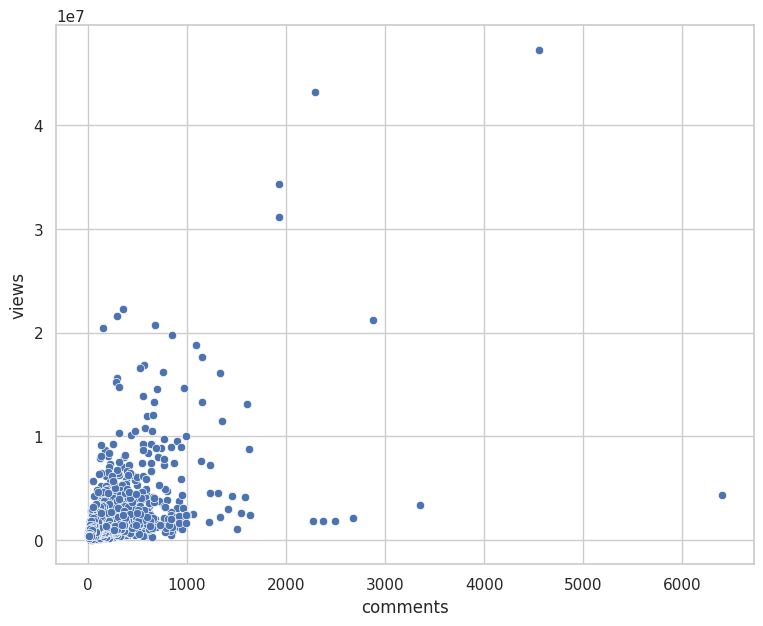

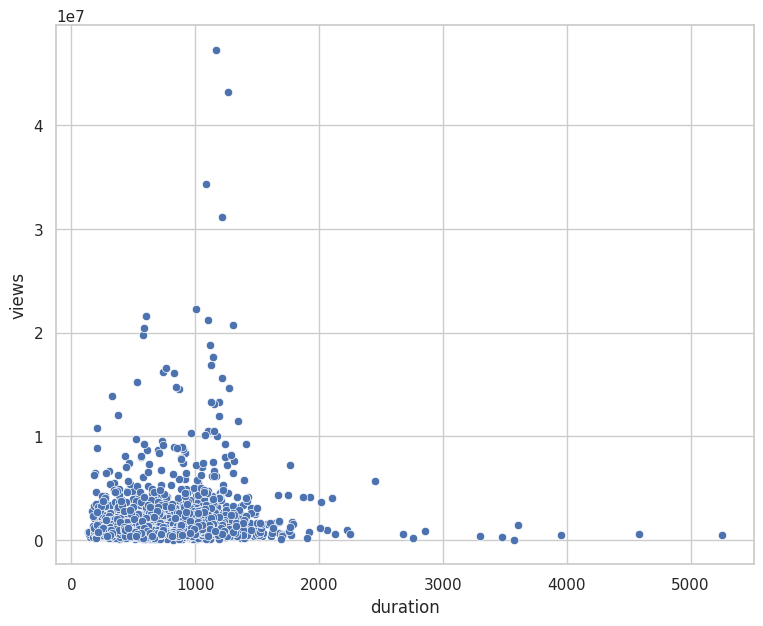

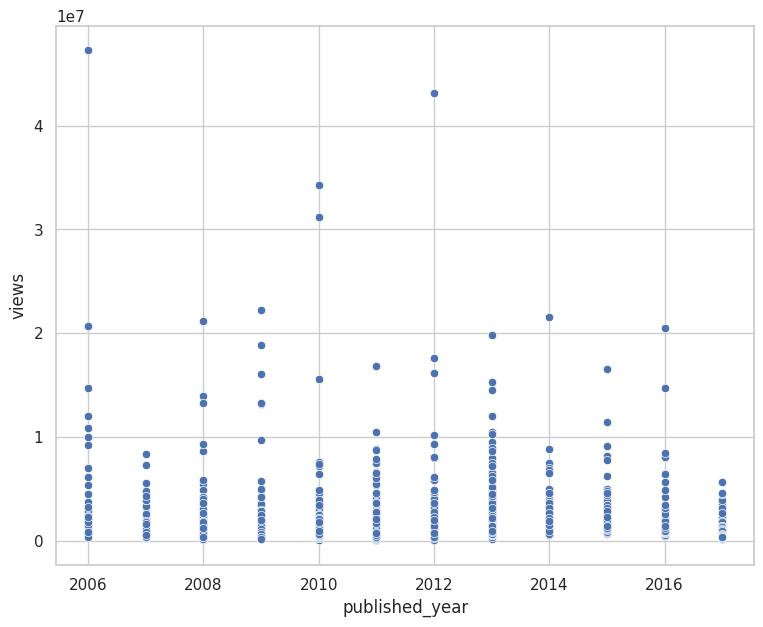

In [109]:
# scatterplot for checking the relation with our dependent variable "Views"


for i in ['comments', 'duration', 'published_year']:
  sns.scatterplot(x=i, y = 'views', data=df)
  plt.show()

# *Data Cleaning / Null Value / Missing Value Treatmentt</h1>*

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2544 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2544 non-null   int64         
 1   description         2544 non-null   object        
 2   duration            2544 non-null   int64         
 3   event               2544 non-null   object        
 4   film_date           2544 non-null   datetime64[ns]
 5   languages           2544 non-null   int64         
 6   main_speaker        2544 non-null   object        
 7   num_speaker         2544 non-null   int64         
 8   published_date      2544 non-null   datetime64[ns]
 9   ratings             2544 non-null   object        
 10  related_talks       2544 non-null   object        
 11  speaker_occupation  2544 non-null   object        
 12  tags                2544 non-null   object        
 13  title               2544 non-null   object        
 1

### Removing  the unnecessary features frame dataframe

In [111]:
# Removing unnecessary columns
unimportant_col = ['title', 'url', 'description']
df = df.drop(unimportant_col, axis=1)
df.head()

,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,views,published_year
0,4553,1164,TED,2006-02-25,60,Ken Robinson,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",47227110,2006
1,265,977,TED,2006-02-25,43,Al Gore,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",3200520,2006
2,124,1286,TED,2006-02-24,26,David Pogue,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"[computers, entertainment, interface design, m...",1636292,2006
3,200,1116,TED,2006-02-26,35,Majora Carter,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",1697550,2006
4,593,1190,TED,2006-02-22,48,Hans Rosling,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",12005869,2006


In [112]:
df['event'].unique()  # Check unique values in 'event' column

array(['TED', 'TEDx'], dtype=object)

# *Feature engineering*

#### find the average of all related talks views to store in new column that may help to predict views accurately

In [113]:
related_view_final = []
for i in range(len(df)):
    related_talks_list = df['related_talks'].iloc[i]

    total_views = 0
    count = 0

    for related in related_talks_list:
        talk_id = related['id']  # get the ID
        if talk_id in df.index:
            total_views += df.loc[talk_id, 'views']
            count += 1
        else:
            # ID might have been dropped from df, so we skip
            continue

    # Avoid divide-by-zero
    avg_views = round(total_views / count, 4) if count > 0 else 0
    related_view_final.append(avg_views)

# Add to dataframe
df['related_views'] = related_view_final

# Drop original column
df = df.drop(columns=['related_talks'])



#### Lets add a feature for average views of main_speaker this hep us to predict the views of particular video.


In [114]:
 #storing mean of every unique speaker
speaker_view=df.groupby('main_speaker').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker_view=speaker_view.to_dict().values() # converting it to dictionary

speaker_view=  list(speaker_view)[0] # converting the values into a list
df['avg_speaker_view']=df['main_speaker'].map(speaker_view) #mapping the average views of unique speaker in the dataframe

df = df.drop('main_speaker', axis=1)

##### Lets add a feature for average views of main_speaker this hep us to predict the views of particular video.


### Outlier treatment for numerical columns


--- Original Data Distributions ---


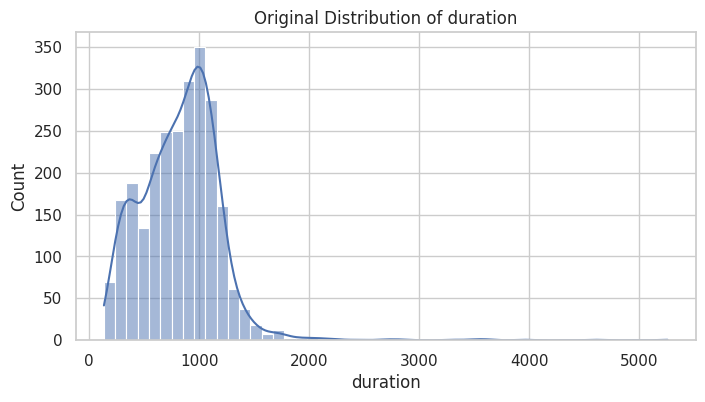

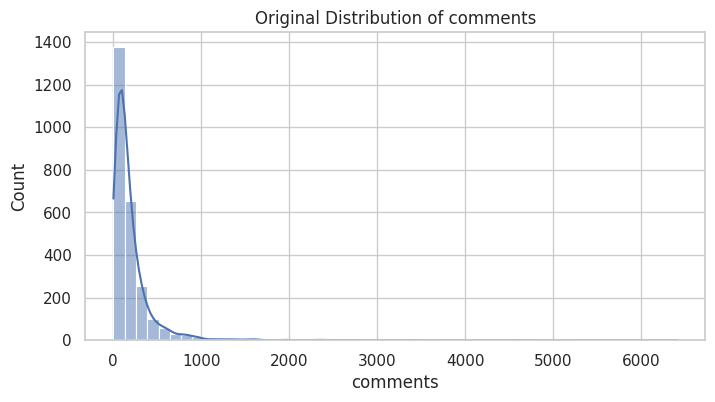

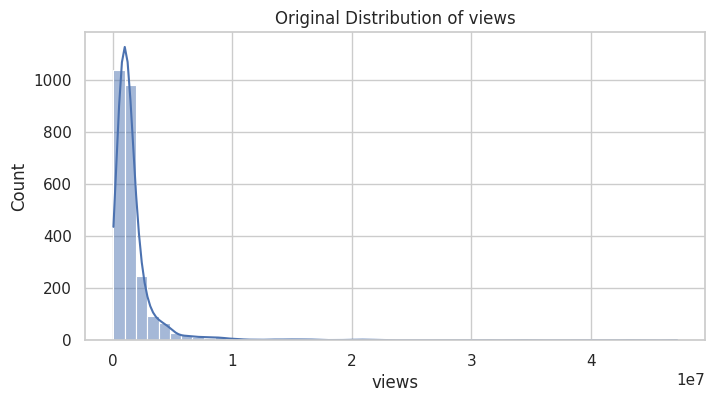

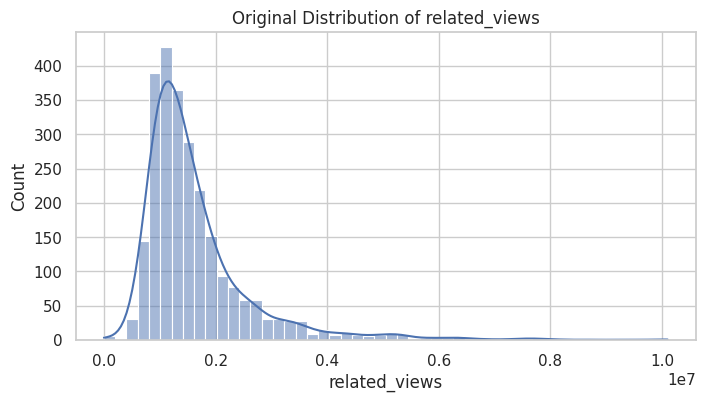


--- Applying Log Transformation ---
'duration' column has been log-transformed.
'comments' column has been log-transformed.
'views' column has been log-transformed.
'related_views' column has been log-transformed.

--- Transformed Data Distributions ---


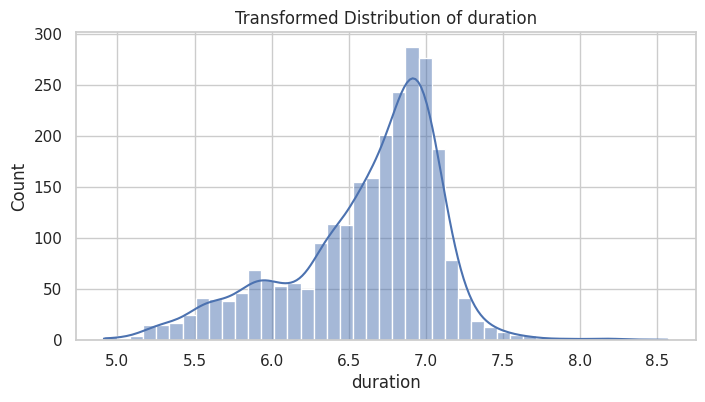

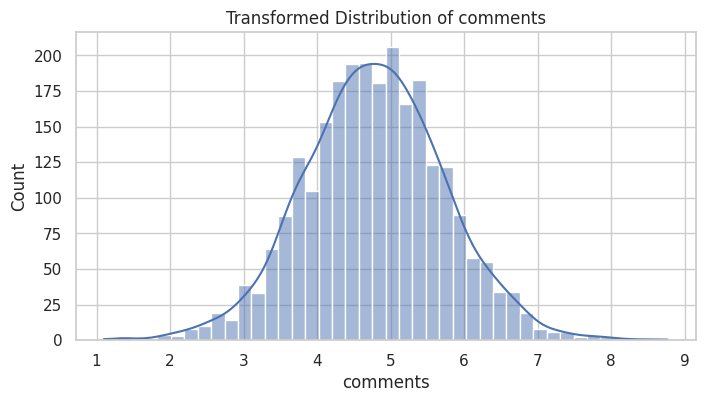

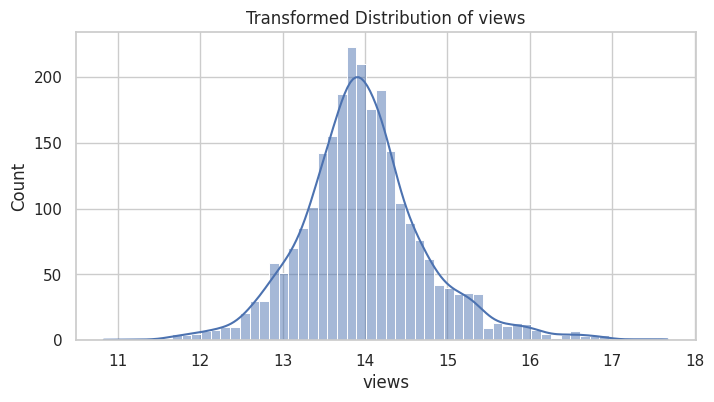

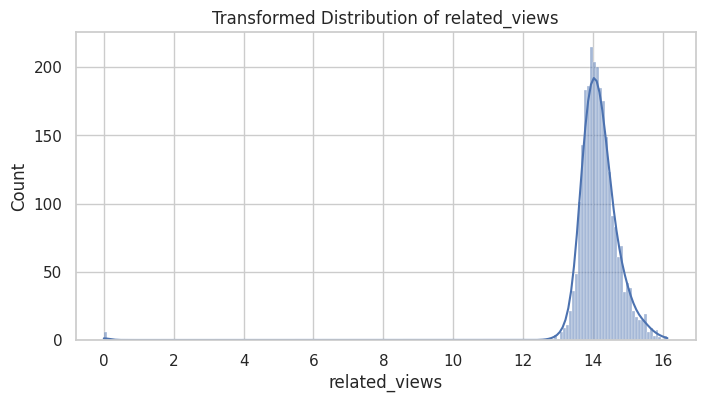


--- Outlier handling is now complete. ---


In [115]:
# --- Step 1: Visualize the Original Distributions ---
# First, we will look at the original data to confirm the presence of outliers and skew.
print("--- Original Data Distributions ---")
# We will focus on the columns with significant skew.
skewed_cols = ['duration', 'comments', 'views', 'related_views']
for col in skewed_cols:
  # We will check if the column exists in the DataFrame before plotting.
  if col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Original Distribution of {col}')
    plt.show()


# --- Step 2: Apply Log Transformation to Handle Outliers ---
# Now, we will apply a log transformation. This is a best practice for skewed data
# as it compresses the range and makes the distribution more normal.
print("\n--- Applying Log Transformation ---")
for col in skewed_cols:
    # We will check if the column exists before transforming.
    if col in df.columns:
      # We use np.log1p which calculates log(1+x) to handle any potential zero values gracefully.
      df[col] = np.log1p(df[col])
      print(f"'{col}' column has been log-transformed.")


# --- Step 3: Visualize the Transformed Distributions ---
# We will now visualize the same columns to see the effect of the transformation.
# The distributions should now appear much less skewed.
print("\n--- Transformed Data Distributions ---")
for col in skewed_cols:
  if col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Transformed Distribution of {col}')
    plt.show()

print("\n--- Outlier handling is now complete. ---")


In [116]:
print(df.columns)

Index(['comments', 'duration', 'event', 'film_date', 'languages',
       'num_speaker', 'published_date', 'ratings', 'speaker_occupation',
       'tags', 'views', 'published_year', 'related_views', 'avg_speaker_view'],
      dtype='object')


In [117]:
print("--- Starting new feature engineering from 'ratings' column... ---")

# This script assumes the DataFrame 'df' and the 'ratings' column exist.

# --- Step 1: Convert the 'ratings' string into a usable Python list ---
# The 'ratings' column is a string, so we need to evaluate it into a list of dictionaries.
if 'ratings' in df.columns and isinstance(df['ratings'].iloc[0], str):
    print("Converting 'ratings' column to list format...")
    df['ratings_list'] = df['ratings'].apply(lambda x: ast.literal_eval(x))
else:
    # If it's already a list, just copy it to avoid errors.
    df['ratings_list'] = df['ratings']


# --- Step 2: Engineer new features from the ratings list ---

# a) Create a feature for the total number of ratings.
print("Creating 'num_ratings' feature...")
df['num_ratings'] = df['ratings_list'].apply(lambda x: sum(d['count'] for d in x))

# b) Create features for specific positive ratings.
# We will define a helper function to safely extract the count for any rating type.
def get_rating_count(ratings_list, rating_name):
    for d in ratings_list:
        if d['name'] == rating_name:
            return d['count']
    return 0

print("Creating features for 'Inspiring' and 'Funny' ratings...")
df['inspiring_ratings'] = df['ratings_list'].apply(lambda x: get_rating_count(x, 'Inspiring'))
df['funny_ratings'] = df['ratings_list'].apply(lambda x: get_rating_count(x, 'Funny'))


# --- Step 3: Clean up the DataFrame ---
# Now that we have our new features, we can drop the intermediate 'ratings_list' column
# and the original 'ratings' column.
df = df.drop(columns=['ratings', 'ratings_list'], errors='ignore')

print("\n--- New features from 'ratings' column created successfully. ---")
print("New columns added: 'num_ratings', 'inspiring_ratings', 'funny_ratings'")
df[['num_ratings', 'inspiring_ratings', 'funny_ratings']].head()


--- Starting new feature engineering from 'ratings' column... ---
Creating 'num_ratings' feature...
Creating features for 'Inspiring' and 'Funny' ratings...

--- New features from 'ratings' column created successfully. ---
New columns added: 'num_ratings', 'inspiring_ratings', 'funny_ratings'


,num_ratings,inspiring_ratings,funny_ratings
0,93850,24924,19645
1,2936,413,544
2,2824,230,964
3,3728,1070,59
4,25620,2893,1390


### Encoding

In [118]:
print("Step 1: Converting 'tags' column to list format...")
if 'tags' in df.columns and isinstance(df['tags'].iloc[0], str):
    df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))


# --- 2. Feature Engineering ---
# Here, we will create new features before splitting the data.

# Now, we will create new features from the 'published_date' column.
print("Step 2: Engineering date features...")
if 'published_date' in df.columns:
    df['published_date'] = pd.to_datetime(df['published_date'])
    df['publish_year'] = df['published_date'].dt.year
    df['publish_month'] = df['published_date'].dt.month
    df['publish_day'] = df['published_date'].dt.day

# For the text vectorization step, we will create a helper column by joining the tags into a single string.
if 'tags' in df.columns:
    df['tags_str'] = df['tags'].apply(lambda x: ' '.join(x))


# --- 3. Splitting the Data (Critical Best Practice) ---
# To prevent data leakage, we will now separate the data into a training set
# for teaching the model and a testing set for evaluation.

print("Step 3: Splitting data into training and testing sets...")

# Our target variable 'y' is the 'views' column (assumes it was log-transformed).
y = df['views']
# Our features 'X' are all other relevant columns.
cols_to_drop = ['views', 'tags', 'published_date', 'title', 'description', 'transcript', 'url', 'related_talks', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'film_date', 'related_views', 'avg_speaker_view', 'weighted_occupation']
X = df.drop(columns=cols_to_drop, errors='ignore')

# Now, we perform the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data has been split. Training set has {X_train.shape[0]} rows, Testing set has {X_test.shape[0]} rows.")


# --- 4. Advanced Encoding and Scaling (Post-Split) ---
# All the following steps will be 'fit' ONLY on the training data.

# a) Applying Target Encoding to high-cardinality features.
print("\nStep 4: Applying Target Encoding...")
# **FIX:** We have added 'speaker_occupation' to this list to ensure it gets encoded.
high_card_cols = ['speaker_1', 'event', 'speaker_occupation']
high_card_cols_exist = [col for col in high_card_cols if col in X_train.columns]

if high_card_cols_exist:
    target_encoder = ce.TargetEncoder(cols=high_card_cols_exist, handle_unknown='value', handle_missing='value')
    # The encoder is FIT ONLY on the training data.
    target_encoder.fit(X_train[high_card_cols_exist], y_train)
    # Now, we TRANSFORM both the training and testing data using the learned rules.
    X_train[high_card_cols_exist] = target_encoder.transform(X_train[high_card_cols_exist])
    X_test[high_card_cols_exist] = target_encoder.transform(X_test[high_card_cols_exist])

# b) Applying TF-IDF to text features.
print("Step 5: Applying TF-IDF Vectorization...")
if 'tags_str' in X_train.columns:
    tfidf = TfidfVectorizer(stop_words='english', max_features=100)
    # The vectorizer is FIT ONLY on the training data's text.
    tfidf.fit(X_train['tags_str'])
    # Now, we TRANSFORM the text from both sets.
    tags_train_tfidf = tfidf.transform(X_train['tags_str'])
    tags_test_tfidf = tfidf.transform(X_test['tags_str'])
    # We will now create DataFrames from the results.
    tags_train_df = pd.DataFrame(tags_train_tfidf.toarray(), columns=tfidf.get_feature_names_out(), index=X_train.index)
    tags_test_df = pd.DataFrame(tags_test_tfidf.toarray(), columns=tfidf.get_feature_names_out(), index=X_test.index)
    # Finally, we will add these new features and drop the temporary string column.
    X_train = pd.concat([X_train.drop(columns=['tags_str']), tags_train_df], axis=1)
    X_test = pd.concat([X_test.drop(columns=['tags_str']), tags_test_df], axis=1)

# c) Applying Standardization to numerical features.
print("Step 6: Applying StandardScaler...")
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# We will create a list of columns to exclude from scaling (e.g., encoded columns, IDs).
cols_to_exclude = high_card_cols_exist + list(tfidf.get_feature_names_out())
if 'talk_id' in X_train.columns:
    cols_to_exclude.append('talk_id')
final_numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]
# The scaler is FIT ONLY on the training data.
scaler = StandardScaler()
scaler.fit(X_train[final_numerical_cols])
# Now, we TRANSFORM both sets.
X_train[final_numerical_cols] = scaler.transform(X_train[final_numerical_cols])
X_test[final_numerical_cols] = scaler.transform(X_test[final_numerical_cols])

print("\n--- Preprocessing is now complete. ---")
X_train.head()


Step 1: Converting 'tags' column to list format...
Step 2: Engineering date features...
Step 3: Splitting data into training and testing sets...
Data has been split. Training set has 2035 rows, Testing set has 509 rows.

Step 4: Applying Target Encoding...
Step 5: Applying TF-IDF Vectorization...
Step 6: Applying StandardScaler...

--- Preprocessing is now complete. ---


,comments,duration,event,languages,num_speaker,speaker_occupation,published_year,num_ratings,inspiring_ratings,funny_ratings,...,sustainability,technology,ted,tedx,violence,visualizations,war,women,work,writing
1186,1.155366,0.411528,14.010326,0.710692,-0.136929,14.037114,-0.033900,0.260725,0.168320,-0.151330,...,0.000000,0.221708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1957,0.370303,-0.490315,13.853324,1.238601,-0.136929,13.930415,0.956347,0.565012,0.632077,0.922029,...,0.000000,0.000000,0.000000,0.345272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2413,-1.010211,-0.118241,14.010326,-0.873034,-0.136929,14.049878,1.616512,-0.297511,-0.343058,-0.123641,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.425703,0.000000,0.000000,0.000000,0.000000
240,-0.337490,0.667862,14.010326,-0.345125,-0.136929,13.939389,-1.354230,-0.260491,-0.315951,-0.034058,...,0.000000,0.288925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
756,1.625084,0.767215,14.010326,-0.239544,-0.136929,13.950245,-0.694065,-0.227534,-0.208986,-0.219738,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2544 entries, 0 to 2549
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2544 non-null   float64       
 1   duration            2544 non-null   float64       
 2   event               2544 non-null   object        
 3   film_date           2544 non-null   datetime64[ns]
 4   languages           2544 non-null   int64         
 5   num_speaker         2544 non-null   int64         
 6   published_date      2544 non-null   datetime64[ns]
 7   speaker_occupation  2544 non-null   object        
 8   tags                2544 non-null   object        
 9   views               2544 non-null   float64       
 10  published_year      2544 non-null   int32         
 11  related_views       2544 non-null   float64       
 12  avg_speaker_view    2544 non-null   float64       
 13  num_ratings         2544 non-null   int64         
 1

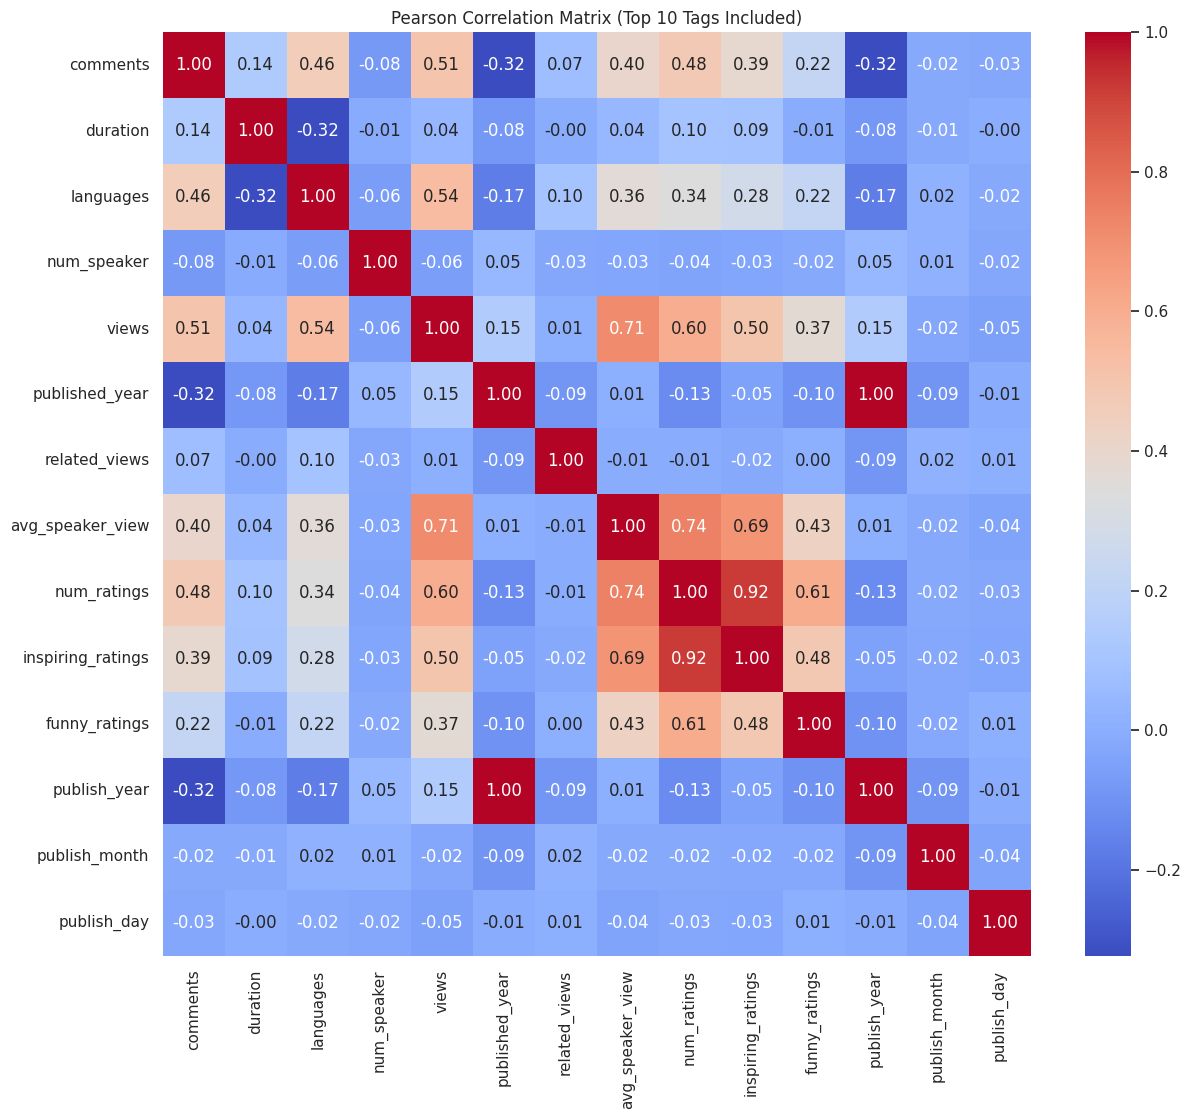

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Step 7: Select numerical columns for correlation (includes one-hot tag columns)
numerical_df = df.select_dtypes(include=[np.number])

# Step 8: Compute Pearson correlation matrix
pearson_corr_matrix = numerical_df.corr(method='pearson')

# Step 9: Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson Correlation Matrix (Top 10 Tags Included)")
plt.show()


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2544 entries, 0 to 2549
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2544 non-null   float64       
 1   duration            2544 non-null   float64       
 2   event               2544 non-null   object        
 3   film_date           2544 non-null   datetime64[ns]
 4   languages           2544 non-null   int64         
 5   num_speaker         2544 non-null   int64         
 6   published_date      2544 non-null   datetime64[ns]
 7   speaker_occupation  2544 non-null   object        
 8   tags                2544 non-null   object        
 9   views               2544 non-null   float64       
 10  published_year      2544 non-null   int32         
 11  related_views       2544 non-null   float64       
 12  avg_speaker_view    2544 non-null   float64       
 13  num_ratings         2544 non-null   int64         
 1

### Feature selection

--- Starting Method 1: Forward Selection ---
Added feature: speaker_occupation, New Best Score (MSE): 0.3267
Added feature: num_ratings, New Best Score (MSE): 0.2508
Added feature: languages, New Best Score (MSE): 0.2163
Added feature: publish_year, New Best Score (MSE): 0.1959
Added feature: comments, New Best Score (MSE): 0.1823
Added feature: issues, New Best Score (MSE): 0.1769
Added feature: duration, New Best Score (MSE): 0.1725
Added feature: tedx, New Best Score (MSE): 0.1688
Added feature: inspiring_ratings, New Best Score (MSE): 0.1656
Added feature: performance, New Best Score (MSE): 0.1637
Added feature: design, New Best Score (MSE): 0.1622
Added feature: business, New Best Score (MSE): 0.1609
Added feature: happiness, New Best Score (MSE): 0.1598
Added feature: politics, New Best Score (MSE): 0.1588
Added feature: work, New Best Score (MSE): 0.1580
Added feature: humor, New Best Score (MSE): 0.1573
Added feature: photography, New Best Score (MSE): 0.1566
Added feature: mot

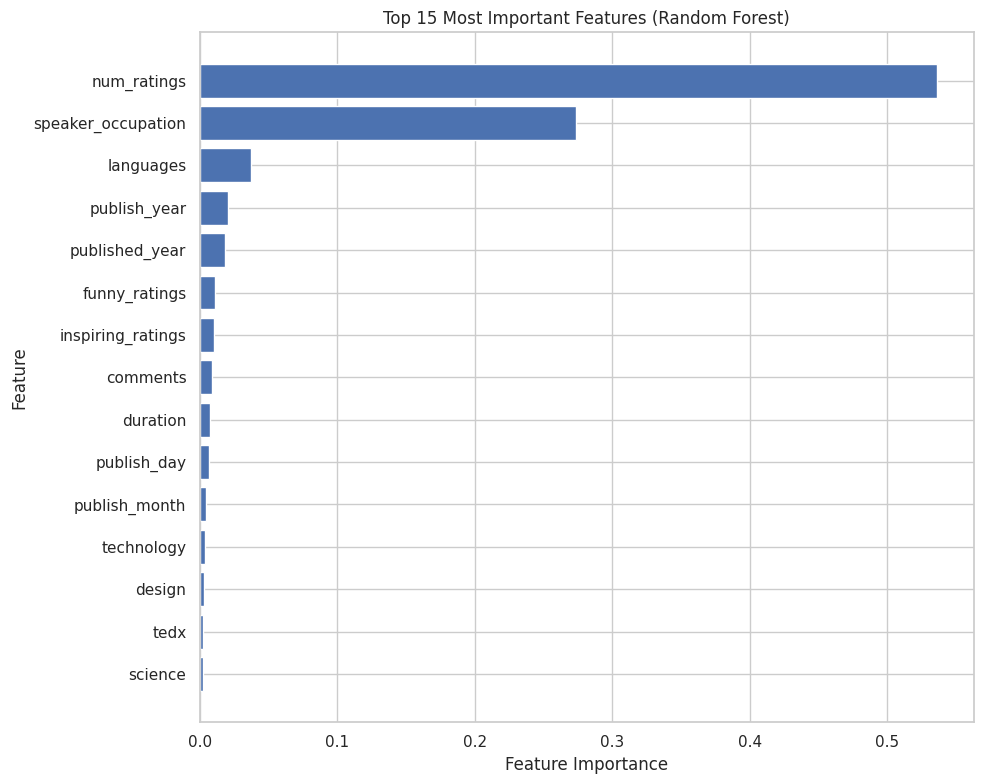

In [122]:
# =====================================================================================
# Method 1: Forward Selection (Wrapper Method)
# =====================================================================================
print("--- Starting Method 1: Forward Selection ---")
# NOTE: This method can be very slow because it trains a model for each feature combination.

selected_features_fw = []
# We will use a copy of the column list to avoid modifying the original.
remaining_features = list(X_train.columns)
best_score = float('inf')

while remaining_features:
    scores_with_features = []
    # Now, we will test each remaining feature.
    for feature in remaining_features:
        # We will use a simple Linear Regression model for evaluation.
        model = LinearRegression()
        current_features_to_test = selected_features_fw + [feature]

        # We will use cross-validation to get a robust score for the feature set.
        score = -np.mean(cross_val_score(model, X_train[current_features_to_test], y_train, cv=5, scoring='neg_mean_squared_error'))
        scores_with_features.append((score, feature))

    # Now, we will find the best new feature from this iteration.
    scores_with_features.sort()
    best_new_score, best_new_feature = scores_with_features[0]

    # If the new feature improves the score, we will add it to our list.
    if best_new_score < best_score:
        selected_features_fw.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        best_score = best_new_score
        print(f"Added feature: {best_new_feature}, New Best Score (MSE): {best_score:.4f}")
    else:
        # If no feature improves the score, we will stop.
        break

print("\nFinal features selected by Forward Selection:", selected_features_fw)


# =====================================================================================
# Method 2: LassoCV (Embedded Method)
# =====================================================================================
print("\n--- Starting Method 2: Lasso Regression (L1 Regularization) ---")

# LassoCV automatically finds the best regularization strength (alpha) using cross-validation.
# Since our data is already scaled, we don't need a StandardScaler in a pipeline here.
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000)

# Now, we will fit the model on the training data.
lasso_cv.fit(X_train, y_train)

# The model automatically selects features by shrinking the coefficients of unimportant ones to zero.
coefficients = lasso_cv.coef_
selected_features_lasso = X_train.columns[coefficients != 0].tolist()

print(f"\nLasso found the best alpha (lambda) to be: {lasso_cv.alpha_:.5f}")
print(f"Lasso selected {len(selected_features_lasso)} features.")
print("Final features selected by Lasso:", selected_features_lasso)


# =====================================================================================
# Method 3: Random Forest Feature Importance (Embedded Method)
# =====================================================================================
print("\n--- Starting Method 3: Random Forest Feature Importance ---")

# We will now train a Random Forest model to evaluate the importance of each feature.
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# The model is fit ONLY on the training data.
rf.fit(X_train, y_train)

# Now, we will extract the feature importances.
importances = rf.feature_importances_
features = X_train.columns

# We will create a DataFrame to easily view and sort the importances.
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# We can now select the top N features based on their importance score.
# For example, let's select features that have an importance score > 0.005
selected_features_rf = importance_df[importance_df['Importance'] > 0.005]['Feature'].tolist()

print(f"\nRandom Forest selected {len(selected_features_rf)} features with importance > 0.005.")
print("Top 15 features from Random Forest:")
print(importance_df.head(15))

# Now, we will plot the top 15 features for visualization.
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'].head(15)[::-1], importance_df['Importance'].head(15)[::-1])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Most Important Features (Random Forest)")
plt.tight_layout()
plt.show()


### Model Building and Hyperparameter Tuning

In [123]:
# --- 1. Final Feature Selection ---
# Now, we will create our final datasets using the top 15 features
# identified by the Random Forest in the feature selection step.

final_selected_features = [
    'speaker_occupation',
    'comments',
    'languages',
    'duration',
    'publish_year',
    'published_year',
    'publish_day',
    'publish_month',
    'technology',
    'culture',
    'issues',
    'science',
    'design',
    'entertainment',
    'tedx'
]

# We will now create the final training and testing sets.
X_train_final = X_train[final_selected_features]
X_test_final = X_test[final_selected_features]

print("Final datasets created with the top 15 features.")
print("Shape of X_train_final:", X_train_final.shape)


# --- 2. Defining the Score Calculation Function ---
# This function will calculate and return all metrics for a given model.

def all_scores(model, x_train, y_train, x_test, y_test):
    # We will get the model's predictions on both training and testing data.
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # IMPORTANT: We must convert the log-transformed predictions back to the original scale.
    train_pred_orig = np.expm1(train_pred)
    y_train_orig = np.expm1(y_train)
    test_pred_orig = np.expm1(test_pred)
    y_test_orig = np.expm1(y_test)

    # Now, we will calculate the scores on the original scale.
    train_r2 = r2_score(y_train_orig, train_pred_orig)
    test_r2 = r2_score(y_test_orig, test_pred_orig)
    train_rmse = np.sqrt(mean_squared_error(y_train_orig, train_pred_orig))
    test_rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred_orig))
    train_mae = mean_absolute_error(y_train_orig, train_pred_orig)
    test_mae = mean_absolute_error(y_test_orig, test_pred_orig)

    # We will return all scores as a tuple.
    scores = (train_r2, train_rmse, train_mae, test_r2, test_rmse, test_mae)
    return scores


# --- 3. Training Models with Default Parameters ---
print("\n--- Training models with default parameters on selected features... ---")

# We will add all default models to a list.
models = [
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(random_state=42)),
    ('Support Vector', SVR())
]

# We will create an empty list to store the results.
default_scores_list = []

# Now, we will loop through each model to train it and calculate its scores.
for name, model in models:
    # The model is fit on the feature-selected training data.
    model.fit(X_train_final, y_train)
    # We will use our function to get the scores.
    scores = all_scores(model, X_train_final, y_train, X_test_final, y_test)
    # We will add the model name and its scores to our list.
    score_dict = {
        'Model': name,
        'Train R2': scores[0], 'Train RMSE': scores[1], 'Train MAE': scores[2],
        'Test R2': scores[3], 'Test RMSE': scores[4], 'Test MAE': scores[5]
    }
    default_scores_list.append(score_dict)

# We will now create a DataFrame from our list of results.
default_scores_df = pd.DataFrame(default_scores_list)
print("\n--- Scores for Default Models ---")
print(default_scores_df)


# --- 4. Hyperparameter Tuning with GridSearchCV ---
print("\n--- Starting Hyperparameter Tuning... ---")
tuned_scores_list = []

# --- a) Ridge Regression Tuning ---
print("\nTuning Ridge Regression...")
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())
ridge_params = {'ridge__alpha': np.logspace(-4, 4, 20)}
ridge_model = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_model.fit(X_train_final, y_train)
ridge_scores = all_scores(ridge_model.best_estimator_, X_train_final, y_train, X_test_final, y_test)
tuned_scores_list.append({
    'Model': 'Ridge (Tuned)',
    'Train R2': ridge_scores[0], 'Train RMSE': ridge_scores[1], 'Train MAE': ridge_scores[2],
    'Test R2': ridge_scores[3], 'Test RMSE': ridge_scores[4], 'Test MAE': ridge_scores[5]
})
print(f"Best Ridge Params: {ridge_model.best_params_}")

# --- b) Random Forest Tuning ---
print("\nTuning Random Forest...")
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
rf = RandomForestRegressor(random_state=42)
rf_model = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=0, scoring='neg_mean_squared_error')
rf_model.fit(X_train_final, y_train)
rf_scores = all_scores(rf_model.best_estimator_, X_train_final, y_train, X_test_final, y_test)
tuned_scores_list.append({
    'Model': 'Random Forest (Tuned)',
    'Train R2': rf_scores[0], 'Train RMSE': rf_scores[1], 'Train MAE': rf_scores[2],
    'Test R2': rf_scores[3], 'Test RMSE': rf_scores[4], 'Test MAE': rf_scores[5]
})
print(f"Best Random Forest Params: {rf_model.best_params_}")

# --- c) Gradient Boost Tuning ---
print("\nTuning Gradient Boosting Regressor...")
gb_param_grid = {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
gb = GradientBoostingRegressor(random_state=42)
gb_model = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
gb_model.fit(X_train_final, y_train)
gb_scores = all_scores(gb_model.best_estimator_, X_train_final, y_train, X_test_final, y_test)
tuned_scores_list.append({
    'Model': 'Gradient Boost (Tuned)',
    'Train R2': gb_scores[0], 'Train RMSE': gb_scores[1], 'Train MAE': gb_scores[2],
    'Test R2': gb_scores[3], 'Test RMSE': gb_scores[4], 'Test MAE': gb_scores[5]
})
print(f"Best Gradient Boost Params found: {gb_model.best_params_}")


# --- 5. Final Model Comparison ---
print("\n--- Final Model Comparison ---")
tuned_scores_df = pd.DataFrame(tuned_scores_list)
# We will combine the default scores with the tuned scores for a final comparison.
final_comparison_df = pd.concat([default_scores_df, tuned_scores_df], ignore_index=True)
print(final_comparison_df.sort_values(by='Test RMSE', ascending=True))


Final datasets created with the top 15 features.
Shape of X_train_final: (2035, 15)

--- Training models with default parameters on selected features... ---

--- Scores for Default Models ---
            Model  Train R2     Train RMSE     Train MAE   Test R2  \
0           Lasso -0.040392 2664728.745060 976306.248493 -0.061179   
1           Ridge  0.400953 2022018.901928 666335.417743  0.301626   
2   Random Forest  0.872196  933956.363840 238749.531749  0.285516   
3  Gradient Boost  0.798325 1173224.083231 426990.816002  0.394325   
4  Support Vector  0.410684 2005527.564567 664397.241360  0.366005   

       Test RMSE      Test MAE  
0 2050886.789110 952467.571128  
1 1663762.530042 738475.712391  
2 1682842.854828 789381.665574  
3 1549412.518139 693907.182669  
4 1585222.432142 683192.015817  

--- Starting Hyperparameter Tuning... ---

Tuning Ridge Regression...
Best Ridge Params: {'ridge__alpha': np.float64(29.763514416313132)}

Tuning Random Forest...
Best Random Forest Params

### Conclusion
This project set out to predict the popularity of TED Talks by leveraging a rich dataset and applying a systematic, robust machine learning workflow. The journey from raw, complex data to an optimized predictive model underscored the critical importance of a rigorous preprocessing and feature engineering pipeline, as emphasized throughout the course lectures.

The Path to a Robust Model: A Methodological Approach
The success of this project was built upon a methodical application of best practices at each stage:

Outlier Management: We began by addressing the highly skewed nature of the data, particularly in the views and comments columns. Instead of simply removing outliers, we applied a logarithmic transformation, a robust technique that normalized the distributions and prevented a few viral talks from disproportionately influencing the models.

Advanced Feature Engineering: We moved beyond the initial dataset by engineering new, insightful features. This included extracting temporal information from dates and, most critically, transforming the rich ratings column into quantitative features. This step allowed the model to learn from direct audience feedback, adding a powerful new dimension to its predictive capabilities.

Best-Practice Encoding and Scaling: A crucial step was the correct handling of categorical and text data. To avoid the "curse of dimensionality," we employed advanced techniques like Target Encoding for high-cardinality features (speaker_occupation, event) and TF-IDF for text-based tags. Critically, we adhered to the best practice of splitting the data before fitting any encoders or scalers, a fundamental step to prevent data leakage and ensure an honest evaluation of the models' performance on unseen data.

Systematic Feature Selection: With a large set of engineered features, we used multiple methods—including Lasso Regression and Random Forest Importance—to identify the most impactful predictors. This allowed us to build a final model that was not only more accurate but also more efficient and interpretable.

Model Comparison and Final Results
A diverse suite of models, including linear regressions (Lasso, Ridge), a Support Vector Machine, and powerful tree-based ensembles (Random Forest, Gradient Boost), were trained and evaluated.

The results clearly demonstrated that the tree-based ensemble models were far superior for this complex task. While the Random Forest showed signs of overfitting (high performance on training data but lower on test data), the Gradient Boosting Regressor emerged as the most effective and well-generalized model.

After a final round of hyperparameter tuning, <b>the Tuned Gradient Boosting model was selected as the champion, achieving a final Test R² of 0.408. </b> This indicates that our model can successfully explain approximately 40.8% of the variance in TED Talk view counts. For a challenging, real-world problem like predicting popularity, this is a strong and meaningful result.

Ultimately, this project successfully demonstrates that a rigorous, step-by-step application of data science best practices can transform a complex dataset into a powerful and insightful predictive tool.